# 连接数据库

In [1]:
import pymysql
import pandas as pd
import numpy as np
connection = pymysql.connect(host='8.129.214.224', #host属性
                             user='root',
                             password='13106999886@Ab',
                             db='freight'
)
cur=connection.cursor()
#查看有哪些数据库
cur.execute('show databases')
print(cur.fetchall())
# 使用数据库
cur.execute('use freight')

(('app',), ('chat',), ('data_auditing',), ('emission',), ('freight',), ('gz_freight',), ('information_schema',), ('log4j',), ('mysql',), ('performance_schema',), ('report',), ('sys',), ('team',), ('userplate',))


0

数据表名称无f：统计口径为部门口径，统计的车辆范围是拥有本地牌照的车辆，例如对于广州市为粤A
数据表名称有f：统计口径为在地口径，统计的车辆范围是在本地的所有车辆，无论是否拥有本地牌照，例如位于广州市的粤A、粤B、赣B等

# 全省高速公路货物流量及流向（2016-2020）

## 获取数据

In [2]:
months=['01','02','03','04','05','06','07','08','09','10','11','12']
years=['2016','2017','2018','2019','2020']
df_qs=pd.DataFrame()
for i in years:
    for j in months:
        str='select* from freight_ip_elgd_'
        sql=str+i+j
        df_temp=pd.read_sql(sql,connection)
        df_qs=pd.concat([df_qs,df_temp])
df_qs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   incity            532 non-null    object 
 1   outcity           532 non-null    object 
 2   freq              532 non-null    float64
 3   avg_total_weight  532 non-null    float64
 4   avg_net_weight    532 non-null    float64
 5   avg_distance      532 non-null    float64
 6   freight           532 non-null    float64
 7   rotation          532 non-null    float64
 8   time              532 non-null    object 
 9   type              532 non-null    object 
dtypes: float64(6), object(4)
memory usage: 45.7+ KB


In [3]:
df_qs[df_qs['time'].isna()]

,incity,outcity,freq,avg_total_weight,avg_net_weight,avg_distance,freight,rotation,time,type


## 统计从2016-2020年，广东省高速公路流入与流出货运量

In [4]:
year_out_volumn=[]
year_in_volumn=[]
for i in years:
    ret1=df_qs[(df_qs['time'].str.contains(i)) & (df_qs['incity']=='广东省')]['freight'].sum()
    ret2=df_qs[(df_qs['time'].str.contains(i)) & (df_qs['outcity']=='广东省')]['freight'].sum()
    year_out_volumn.append(ret1)
    year_in_volumn.append(ret2)

In [5]:
year_out_volumn,year_in_volumn

([14918934.0, 22081326.0, 26673271.0, 28607026.0, 566695.696],
 [14592968.0, 22814684.0, 25598696.0, 27988139.0, 506684.059])

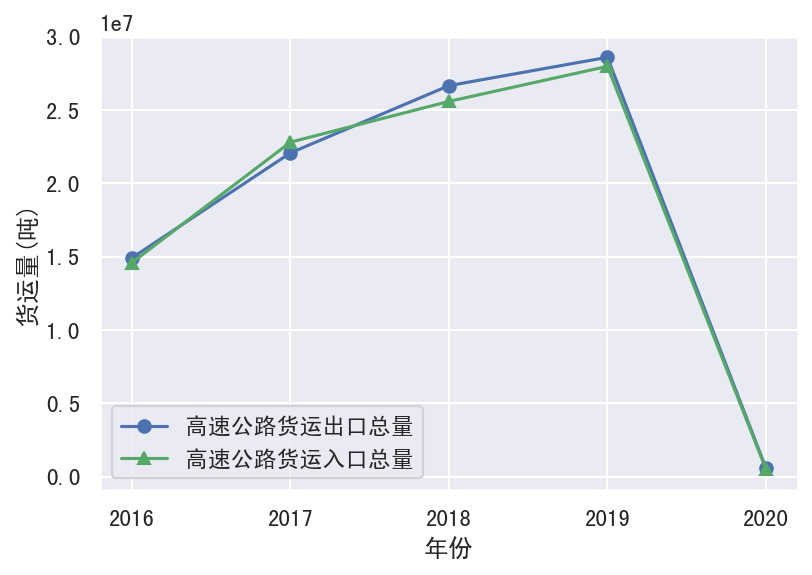

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set(font='SimHei')
fig=plt.figure(1,dpi=150)
plt.plot(years,year_out_volumn,color='b',marker='o',label='高速公路货运出口总量')
plt.plot(years,year_in_volumn,color='g',marker='^',label='高速公路货运入口总量')
plt.xlabel('年份')
plt.ylabel('货运量(吨)')
plt.legend()
plt.show()

## 统计从2016-2020年，广东省高速公路货运量流向分布情况

In [22]:
#绘制多类型直方图
sns.set_style('whitegrid')
sns.set(font='SimHei')
province=df_qs['incity'].unique()#获取各省份名称

array(['广东省', '海南省', '广西自治区', '江西省', '福建省', '湖南省'], dtype=object)

In [57]:
#构建广东省在2016-2020年的出口和入口dataframe
column=[c for c in province if c !='广东省']

In [89]:
#出口货运量
rows_list=[]
for year in years:
    dict={}#创建一个字典来存放每行数据，从而构建起pd，并绘制图
    for p in column:
        ret=df_qs[(df_qs['incity']=='广东省')&(df_qs['outcity']==p)&(df_qs['time'].str.contains(year))]['freight'].sum()
        dict[p]=ret
    dict['年份']=int(year)
    rows_list.append(dict)
df_out=pd.DataFrame(rows_list)
df_out

,海南省,广西自治区,江西省,福建省,湖南省,年份
0,777585.000,4733385.0,5163153.0,724506.0,3520305.0,2016
1,561019.000,8241084.0,5131536.0,1420258.0,6727429.0,2017
2,602290.000,9876415.0,7138341.0,2126857.0,6929368.0,2018
3,729687.000,10623656.0,6711835.0,2577407.0,7964441.0,2019
4,566695.696,0.0,0.0,0.0,0.0,2020


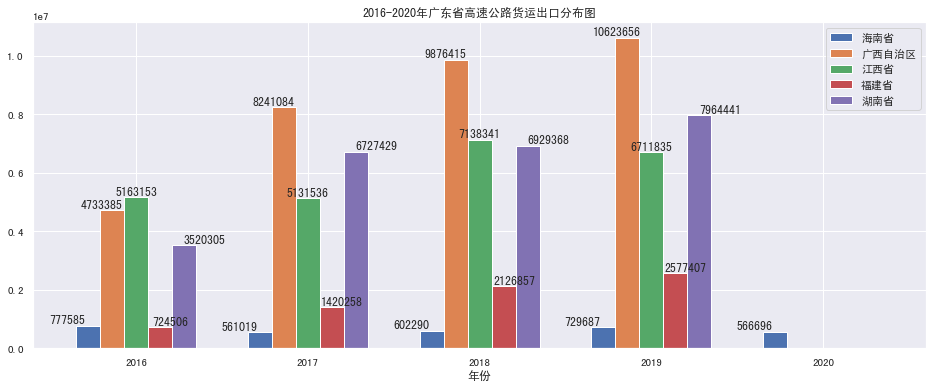

In [101]:
df_out.plot(x='年份',y=column,kind="bar",figsize=(16,6),width=0.7,rot=0,title='2016-2020年广东省高速公路货运出口分布图')
#绘制数据标签
for i in range(5):
    for j in range(5):
        if(df_out.iloc[i][j]!=0):
            plt.text(i+(j-2)*0.2,df_out.iloc[i][j],"%.0f"% float(df_out.iloc[i][j]),ha='center',va='bottom',fontsize=12)

In [91]:
df_out.iloc[0][2]/1e7

0.5163153